<a href="https://colab.research.google.com/github/savibatuan/PHYS486-S22/blob/main/FinalProject/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

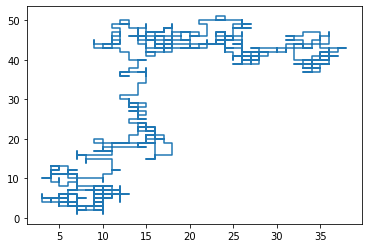

In [8]:
#Generic Random Walk without defect(2D)

import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.linalg as la

#the number of steps the simulation is going to move
step = 1000 
#the allowed grid size on which the simulation will be performed(i.e grid= 10 will produce 10x10 matrix)
grid = 10

#Create the arrays to store positions in x and y direction
#Starting movement from the midpoint
if grid % 2 == 0: #checks if given grid is divisible by 2 to find midpoint
  midpoint = grid/2
else:
    midpoint = (grid-1)/2 #if not divisable by 2, then subtract one and then find midpoint
x = np.full((step) , midpoint)
y = np.full((step), midpoint)

#Creating the directions the simulation can move in
direction=["Up", "Down", "Left", "Right"]

#Creating a matrix from the given grid size, within which the simulation is allowed to move
def matrix(grid):
  rows = grid
  cols = grid
  return rows, cols
  
rows, cols = matrix(grid)
for i in range(1,step):
  move = random.choice(direction)
  if move == "Up":
    if y[i] == rows : #if the simulation position is at the top of the allowed matrix the move will be disregarded
      x[i] = x[i-1]
      y[i] = y[i-1]
    else:
      x[i] = x[i-1]
      y[i] = y[i-1] + 1 #otherwise it will move one position up

  elif move == "Down":
    if y[i] == 0:
      x[i] = x[i-1]
      y[i] = y[i-1]
    else:
      x[i] = x[i-1]
      y[i] = y[i-1] -1


  elif move == "Left":
    if x[i] == 0:
      x[i] = x[i-1]
      y[i] = y[i-1]
    else:    
      x[i] = x[i-1] -1
      y[i] = y[i-1]


  elif move == "Right":
    if x[i] == cols:
      x[i] = x[i-1]
      y[i] = y[i-1]
    else:
      x[i] = x[i-1] +1
      y[i] = y[i-1]

plt.plot(x,y)
plt.show()


In [37]:
#Generic Random Walk with defect(2D)


**Max Entopy Random Walk with Defects**



In [67]:
#Setting up the same initial conditions as the generic random walk

step = 1000 
grid = 10

if grid % 2 == 0: 
  midpoint = grid/2
else:
    midpoint = (grid-1)/2
x = np.full((step) , midpoint)
y = np.full((step), midpoint)

direction=["Up", "Down", "Left", "Right"]

def matrix(grid):
  rows = grid
  cols = grid
  return rows, cols

In [68]:
#Setting the intial conditions for the density 

#The density of defects within a given grid
density = .1 

#Determines the numbers of defects in the given grid
num_defects = int(density * rows * cols)

print("Total Defects: ", num_defects)

Total Defects:  10


In [69]:
#First creating an intial matrix for the simulation to run on
#Takes in the size of the input grid and returns all the possible positions on the grid

def create_matrix(grid):
  #Creates a matrix filled with zeros
  vector = np.zeros(grid) 
  #Sets vector in index 1 and -1 to 1
  vector[1] = 1 
  vector [-1] = 1
  #Creates a circulant matrix the size of the given grid. Looks like ones on the longest off diagonals and ones in the upper right corener and lower left corner
  offDiagonal = la.circulant(vector)
  #Creates array with ones on the diagonal and zeros everywhere else
  diagonal = np.eye(grid)
  #Finds the Kronecker product of the diagonal and offdiagonals
  #The primary reason for this move is to remove the ones in the corners
  initial_matrix = np.kron(offDiagonal, diagonal) + np.kron (diagonal, offDiagonal) 
  print(initial_matrix)
  #Returns an intial matrix populated 
  return initial_matrix 

In [70]:
#Randomly determine the position of the defects in the established inital matrix

def add_defects(initial_matrix, num_defects):
  for i in range (num_defects):
    #For every defect, a random position is assigned within the inital matrix
    defect_position = np.random.randint(0, rows*cols)
    #Sets the x position of the defect in the matrix
    initial_matrix[defect_position, :] = 0
    #Sets the y position of the defect in the matrix
    initial_matrix[:, defect_position] = 0
  return initial_matrix

In [71]:
matrix = create_matrix(grid)
matrix = add_defects(matrix, num_defects)

diag_adj = np.diag(matrix)

eig_values, eig_vectors = la.eig(matrix)

eig_values = np.real_if_close(eig_values, tol=1)
eig_vectors = np.real_if_close(eig_vectors, tol=1)

max_Evalue = np.amax(eig_values)
max_index = np.where(eig_values == np.amax(eig_values))
max_Evector = eig_vectors.T[0]

pie_star= np.zeros((grid*grid))
pie_starD= np.zeros((grid*grid))
pie_sum=0

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


Pie sum: 0.9999999999999998


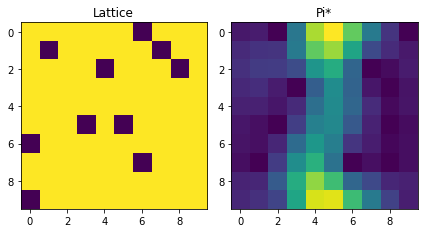

In [72]:
for i in range (grid*grid):
    pie_starD[i] = max_Evalue * max_Evalue
    pie_star[i]= max_Evector[i] * max_Evector[i]
    pie_sum += pie_star[i]
pie_star=np.reshape(pie_star,[grid,grid])
pie_starD=np.reshape(pie_starD,[grid,grid])

print("Pie sum:", pie_sum)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(Lattice.T)
axs[0].set_title("Lattice")
axs[1].imshow(pie_star.T)
axs[1].set_title("Pi*")
fig.tight_layout()


Random code I deleted but might still want to reuse later below:

Total Defects:  10
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]
Pie sum: 0.9999999999999997


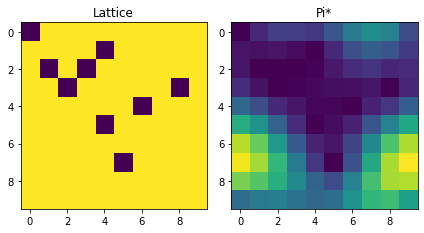

In [12]:
##Max Entropy Random Walk with defect
density = .1 #The density of defects within a given grid

#Determines the numbers of defects in the given grid
num_defects = int(density * rows * cols)
print("Total Defects: ", num_defects)

#First creating an intial matrix for the simulation to run on
#Takes in the size of the input grid and returns all the possible positions on the grid
def create_matrix(grid):
  #Creates a matrix filled with zeros
  vector = np.zeros(grid) 
  #Sets vector in index 1 and -1 to 1
  vector[1] = 1 
  vector [-1] = 1
  #Creates a circulant matrix the size of the given grid. Looks like ones on the longest off diagonals and ones in the upper right corener and lower left corner
  offDiagonal = la.circulant(vector)
  #Creates array with ones on the diagonal and zeros everywhere else
  diagonal = np.eye(grid)
  #Finds the Kronecker product of the diagonal and offdiagonals
  #The primary reason for this move is to remove the ones in the corners
  initial_matrix = np.kron(offDiagonal, diagonal) + np.kron (diagonal, offDiagonal) 
  print(initial_matrix)
  #Returns an intial matrix populated 
  return initial_matrix 


#Randomly determine the position of the defects in the established inital matrix
def add_defects(initial_matrix, num_defects):
  for i in range (num_defects):
    defect_position = np.random.randint(0, rows*cols)
    initial_matrix[defect_position, :] = 0
    initial_matrix[:, defect_position] = 0
  return initial_matrix

#Adds the defects to the graph, from the position they are randomly assigned from add_defects
def add_to_graph(intial_matrix):
  zero_row = np.where(~intial_matrix.any(axis=0))[0]
  zero_col = np.where(~intial_matrix.any(axis=1))[0]
  lat = np.ones([grid,grid])
  #print(zero_row, zero_col)
  for i in range(zero_row.shape[0]):
      row = int(zero_row[i] / grid)
      col = int(zero_col[i] % grid)
      lat[row,col]=0
  return lat


def NN_prob(x0,y0):
    i = int(x0 + (grid*(y0)))
    #print("x,y,i:", x0, y0,i)

    ind = np.asarray(np.nonzero(A[i]))[0]
    #print("Total neighbours:", len(ind))
    prob = [0,0,0,0]
    #print("Non-Zero Indices for :", x0, y0)
    for j in range(len(ind)):
        nbr = ind[j]
        val = A[i, nbr]
        x1 = nbr % grid
        y1 = int(nbr / grid)
        dx = x1 - x0
        dy = y1 - y0
        move = ""
        if dx == -1:
            move = "Left"
            prob[2] = abs((val* max_Evector[nbr])/( max_Evalue * max_Evector[i]))
        elif dx == 1:
            move = "Right"
            prob[3] = abs((val* max_Evector[nbr])/( max_Evalue * max_Evector[i]))
        elif dy == 1:
            move = "Down"
            prob[1] = abs((val* max_Evector[nbr])/( max_Evalue * max_Evector[i]))
        elif dy == -1:
            move = "Up"
            prob[0] = abs((val* max_Evector[nbr])/( max_Evalue * max_Evector[i]))
        elif dx > 1:
            move = "Left"
            prob[2] = abs((val* max_Evector[nbr])/( max_Evalue * max_Evector[i]))
        elif dx < -1:
            move = "Right"
            prob[3] = abs((val* max_Evector[nbr])/( max_Evalue * max_Evector[i]))
        elif dy > 1:
            move = "Up"
            prob[0] = abs((val* max_Evector[nbr])/( max_Evalue * max_Evector[i]))
        elif dy < -1:
            move = "Down"
            prob[1] = abs((val* max_Evector[nbr])/( max_Evalue * max_Evector[i]))
        else:
            move = "Other"
        #print(x1, y1)
        #print("dx,dy:", dx, dy, move)
    print(prob[0]+prob[1]+prob[2]+prob[3])
    prob[:]= prob[:]/ (prob[0]+prob[1]+prob[2]+prob[3])
    return prob

A = create_matrix(grid)
A = add_defects(A, num_defects)
#print(defect_A)
Lattice = add_to_graph(A)

diag_adj = np.diag(A)

eig_values, eig_vectors = la.eig(A)

eig_values = np.real_if_close(eig_values, tol=1)
eig_vectors = np.real_if_close(eig_vectors, tol=1)

max_Evalue = np.amax(eig_values)
max_index = np.where(eig_values == np.amax(eig_values))
max_Evector = eig_vectors.T[0]

pie_star= np.zeros((grid*grid))
pie_starD= np.zeros((grid*grid))
pie_sum=0

for i in range (grid*grid):
    pie_starD[i] = max_Evalue * max_Evalue
    pie_star[i]= max_Evector[i] * max_Evector[i]
    pie_sum += pie_star[i]
pie_star=np.reshape(pie_star,[grid,grid])
pie_starD=np.reshape(pie_starD,[grid,grid])

print("Pie sum:", pie_sum)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(Lattice.T)
axs[0].set_title("Lattice")
axs[1].imshow(pie_star.T)
axs[1].set_title("Pi*")
fig.tight_layout()
